In [37]:
import numpy as np
import numpy.polynomial.polynomial as npoly
from scipy import optimize
import matplotlib.pyplot as plt
np.random.seed(2017)
import pandas as pd


df=pd.read_csv("./data/cost_inn_obj.csv",names=["t", "inn1", "inn2", "inn3", "inn4", "inn5"],header=0)

In [38]:
df

,t,inn1,inn2,inn3,inn4,inn5
0,0.00,2.001924,3.010337,4.005545,2.004383,3.993697
1,1.25,2.393374,3.067629,3.808804,2.164827,3.978017
2,2.50,2.691672,3.112895,3.639357,2.295667,3.935968
3,3.75,2.910417,3.154308,3.502667,2.408235,3.882509
4,5.00,3.087080,3.193916,3.398460,2.509533,3.826591
5,6.25,3.241784,3.232742,3.324525,2.604196,3.773540
6,7.50,3.386018,3.271544,3.278091,2.695407,3.726487
7,8.75,3.526608,3.310952,3.256364,2.785395,3.687242
8,10.00,3.667716,3.351499,3.256736,2.875757,3.656813
9,11.25,3.811936,3.393643,3.276862,2.967651,3.635733


In [39]:
inn_reg=pd.DataFrame(columns=["Inn","C0R1","C1R1","C0R2","C1R2","C0R3","C1R3","C0R4","C1R4","C0R5","C1R5"])
inn_xrang=pd.DataFrame(columns=["R0","R1","R2","R3","R4","R5"])
inn_yrang=pd.DataFrame(columns=["Y0","Y1","Y2","Y3","Y4","Y5"])

y = 2.017449145878598 + 0.2758993387301937·x¹, if x in [0.0, 2.5]
y = 2.4502329105756164 + 0.1231200622855336·x¹, if x in [3.75, 18.75]
y = 1.1045072939881666 + 0.19172878708416755·x¹, if x in [20.0, 31.25]
y = -1.6505696280547197 + 0.2786004716122741·x¹, if x in [32.5, 41.25]
y = -5.833778885107392 + 0.37855224956137007·x¹, if x in [42.5, 50.0]


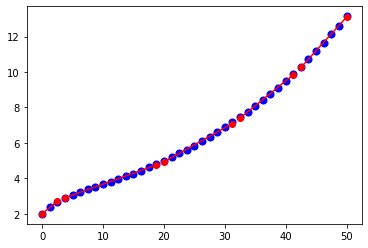

In [40]:
#inn1
inn=1
def f(breakpoints, x, y, fcache):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    if breakpoints not in fcache:
        total_error = 0
        for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
            total_error += ((f(xi) - yi)**2).sum()
        fcache[breakpoints] = total_error
    # print('{} --> {}'.format(breakpoints, fcache[breakpoints]))
    return fcache[breakpoints]

def find_best_piecewise_polynomial(breakpoints, x, y):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    xs = np.split(x, breakpoints)
    ys = np.split(y, breakpoints)
    result = []
    for xi, yi in zip(xs, ys):
        if len(xi) < 2: continue
        coefs = npoly.polyfit(xi, yi, 1)
        f = npoly.Polynomial(coefs)
        result.append([f, xi, yi])
    return result

x = np.array(df.t)
y = np.array(df.inn1)

num_breakpoints = 4
breakpoints = optimize.brute(
    f, [slice(1, len(x), 1)]*num_breakpoints, args=(x, y, {}), finish=None)

plt.scatter(x, y, c='blue', s=50)
count=1
for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
    x_interval = np.array([xi.min(), xi.max()])
    inn_reg.loc[inn,"C0R"+str(count)]=round(f.convert().coef[0],3)
    inn_reg.loc[inn,"C1R"+str(count)]=round(f.convert().coef[1],3)
    inn_xrang.loc[inn,"R"+str(count)]=x_interval[1]
    inn_yrang.loc[inn,"Y"+str(count)]=f(x_interval[1])
    print('y = {:35s}, if x in [{}, {}]'.format(str(f), *x_interval))
    count=count+1
    plt.plot(x_interval, f(x_interval), 'ro-')

inn_reg.loc[inn,"Inn"]=inn
inn_xrang.loc[inn,"R0"]=0.0
inn_yrang.loc[inn,"Y0"]=0.0
#inn_xrang.loc[inn,"Inn"]=inn
plt.show()



y = 3.019728236993825 + 0.03397059837628478·x¹, if x in [0.0, 16.25]
y = 2.639586397930931 + 0.056396712075764084·x¹, if x in [17.5, 26.25]
y = 1.8517194905010645 + 0.08572935021782323·x¹, if x in [27.5, 35.0]
y = 0.6636227742663632 + 0.11915014278796321·x¹, if x in [36.25, 42.5]
y = -1.031562416505095 + 0.15835512976221278·x¹, if x in [43.75, 50.0]


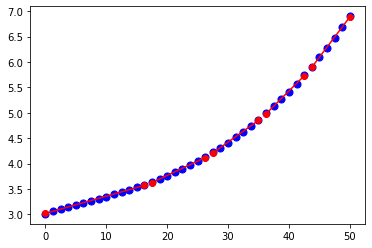

In [41]:
inn=2
def f(breakpoints, x, y, fcache):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    if breakpoints not in fcache:
        total_error = 0
        for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
            total_error += ((f(xi) - yi)**2).sum()
        fcache[breakpoints] = total_error
    # print('{} --> {}'.format(breakpoints, fcache[breakpoints]))
    return fcache[breakpoints]

def find_best_piecewise_polynomial(breakpoints, x, y):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    xs = np.split(x, breakpoints)
    ys = np.split(y, breakpoints)
    result = []
    for xi, yi in zip(xs, ys):
        if len(xi) < 2: continue
        coefs = npoly.polyfit(xi, yi, 1)
        f = npoly.Polynomial(coefs)
        result.append([f, xi, yi])
    return result

x = np.array(df.t)
y = np.array(df.inn2)

num_breakpoints = 4
breakpoints = optimize.brute(
    f, [slice(1, len(x), 1)]*num_breakpoints, args=(x, y, {}), finish=None)
count=1
plt.scatter(x, y, c='blue', s=50)
for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
    x_interval = np.array([xi.min(), xi.max()])
    inn_reg.loc[inn,"C0R"+str(count)]=round(f.convert().coef[0],3)
    inn_reg.loc[inn,"C1R"+str(count)]=round(f.convert().coef[1],3)
    inn_xrang.loc[inn,"R"+str(count)]=x_interval[1]
    inn_yrang.loc[inn,"Y"+str(count)]=f(x_interval[1])
    print('y = {:35s}, if x in [{}, {}]'.format(str(f), *x_interval))
    count=count+1
    plt.plot(x_interval, f(x_interval), 'ro-')

inn_reg.loc[inn,"Inn"]=inn
inn_xrang.loc[inn,"R0"]=0.0
inn_yrang.loc[inn,"Y0"]=0.0
#inn_xrang.loc[inn,"Inn"]=inn
plt.show()



y = 3.9541421322060413 - 0.10909308563606322·x¹, if x in [0.0, 6.25]
y = 3.004108624793754 + 0.02813775619476422·x¹, if x in [7.5, 16.25]
y = 1.5294315160522318 + 0.11565525992900955·x¹, if x in [17.5, 28.75]
y = -0.6152008011886967 + 0.18898804629411403·x¹, if x in [30.0, 40.0]
y = -3.9567624724410906 + 0.2712397896979747·x¹, if x in [41.25, 50.0]


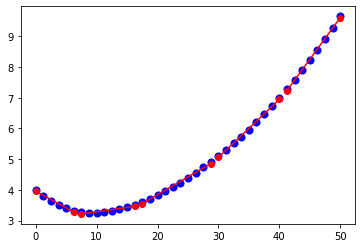

In [42]:
inn=3
def f(breakpoints, x, y, fcache):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    if breakpoints not in fcache:
        total_error = 0
        for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
            total_error += ((f(xi) - yi)**2).sum()
        fcache[breakpoints] = total_error
    # print('{} --> {}'.format(breakpoints, fcache[breakpoints]))
    return fcache[breakpoints]

def find_best_piecewise_polynomial(breakpoints, x, y):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    xs = np.split(x, breakpoints)
    ys = np.split(y, breakpoints)
    result = []
    for xi, yi in zip(xs, ys):
        if len(xi) < 2: continue
        coefs = npoly.polyfit(xi, yi, 1)
        f = npoly.Polynomial(coefs)
        result.append([f, xi, yi])
    return result

x = np.array(df.t)
y = np.array(df.inn3)

num_breakpoints = 4
breakpoints = optimize.brute(
    f, [slice(1, len(x), 1)]*num_breakpoints, args=(x, y, {}), finish=None)
count=1
plt.scatter(x, y, c='blue', s=50)
for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
    x_interval = np.array([xi.min(), xi.max()])
    inn_reg.loc[inn,"C0R"+str(count)]=round(f.convert().coef[0],3)
    inn_reg.loc[inn,"C1R"+str(count)]=round(f.convert().coef[1],3)
    inn_xrang.loc[inn,"R"+str(count)]=x_interval[1]
    inn_yrang.loc[inn,"Y"+str(count)]=f(x_interval[1])
    print('y = {:35s}, if x in [{}, {}]'.format(str(f), *x_interval))
    count=count+1
    plt.plot(x_interval, f(x_interval), 'ro-')

inn_reg.loc[inn,"Inn"]=inn
inn_xrang.loc[inn,"R0"]=0.0
inn_yrang.loc[inn,"Y0"]=0.0
#inn_xrang.loc[inn,"Inn"]=inn
plt.show()




y = 2.0767036124722154 + 0.07995493139313226·x¹, if x in [0.0, 18.75]
y = 1.4715204166855924 + 0.11105065920656988·x¹, if x in [20.0, 27.5]
y = 0.35815779691253513 + 0.15040366344803371·x¹, if x in [28.75, 36.25]
y = -1.403310645263598 + 0.19826134796441897·x¹, if x in [37.5, 43.75]
y = -3.679898061598882 + 0.24969024776990736·x¹, if x in [45.0, 50.0]


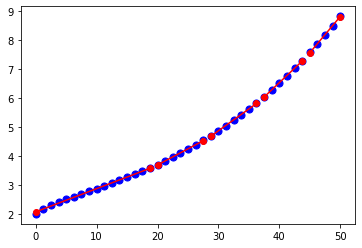

In [43]:
inn=4
def f(breakpoints, x, y, fcache):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    if breakpoints not in fcache:
        total_error = 0
        for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
            total_error += ((f(xi) - yi)**2).sum()
        fcache[breakpoints] = total_error
    # print('{} --> {}'.format(breakpoints, fcache[breakpoints]))
    return fcache[breakpoints]

def find_best_piecewise_polynomial(breakpoints, x, y):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    xs = np.split(x, breakpoints)
    ys = np.split(y, breakpoints)
    result = []
    for xi, yi in zip(xs, ys):
        if len(xi) < 2: continue
        coefs = npoly.polyfit(xi, yi, 1)
        f = npoly.Polynomial(coefs)
        result.append([f, xi, yi])
    return result

x = np.array(df.t)
y = np.array(df.inn4)

num_breakpoints = 4
breakpoints = optimize.brute(
    f, [slice(1, len(x), 1)]*num_breakpoints, args=(x, y, {}), finish=None)
count=1
plt.scatter(x, y, c='blue', s=50)
for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
    x_interval = np.array([xi.min(), xi.max()])
    inn_reg.loc[inn,"C0R"+str(count)]=round(f.convert().coef[0],3)
    inn_reg.loc[inn,"C1R"+str(count)]=round(f.convert().coef[1],3)
    inn_xrang.loc[inn,"R"+str(count)]=x_interval[1]
    inn_yrang.loc[inn,"Y"+str(count)]=f(x_interval[1])
    print('y = {:35s}, if x in [{}, {}]'.format(str(f), *x_interval))
    count=count+1
    plt.plot(x_interval, f(x_interval), 'ro-')

inn_reg.loc[inn,"Inn"]=inn
inn_xrang.loc[inn,"R0"]=0.0
inn_yrang.loc[inn,"Y0"]=0.0
#inn_xrang.loc[inn,"Inn"]=inn

plt.show()



y = 4.006973938855497 - 0.03507807572085077·x¹, if x in [0.0, 11.25]
y = 3.323425925938945 + 0.021410241297741155·x¹, if x in [12.5, 21.25]
y = 2.0399274398733414 + 0.08015742455593966·x¹, if x in [22.5, 31.25]
y = 0.11212209666800782 + 0.14051504341385476·x¹, if x in [32.5, 41.25]
y = -2.634652071744755 + 0.20624673598601645·x¹, if x in [42.5, 50.0]


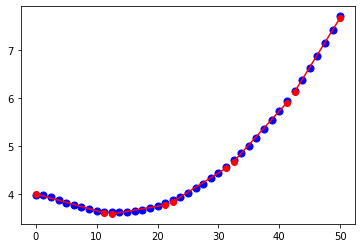

In [44]:
inn=5
def f(breakpoints, x, y, fcache):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    if breakpoints not in fcache:
        total_error = 0
        for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
            total_error += ((f(xi) - yi)**2).sum()
        fcache[breakpoints] = total_error
    # print('{} --> {}'.format(breakpoints, fcache[breakpoints]))
    return fcache[breakpoints]

def find_best_piecewise_polynomial(breakpoints, x, y):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    xs = np.split(x, breakpoints)
    ys = np.split(y, breakpoints)
    result = []
    for xi, yi in zip(xs, ys):
        if len(xi) < 2: continue
        coefs = npoly.polyfit(xi, yi, 1)
        f = npoly.Polynomial(coefs)
        result.append([f, xi, yi])
    return result

x = np.array(df.t)
y = np.array(df.inn5)

num_breakpoints = 4
breakpoints = optimize.brute(
    f, [slice(1, len(x), 1)]*num_breakpoints, args=(x, y, {}), finish=None)
count=1
plt.scatter(x, y, c='blue', s=50)
for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
    x_interval = np.array([xi.min(), xi.max()])
    inn_reg.loc[inn,"C0R"+str(count)]=round(f.convert().coef[0],3)
    inn_reg.loc[inn,"C1R"+str(count)]=round(f.convert().coef[1],3)
    inn_xrang.loc[inn,"R"+str(count)]=x_interval[1]
    inn_yrang.loc[inn,"Y"+str(count)]=f(x_interval[1])
    print('y = {:35s}, if x in [{}, {}]'.format(str(f), *x_interval))
    count=count+1
    plt.plot(x_interval, f(x_interval), 'ro-')

inn_reg.loc[inn,"Inn"]=inn
inn_xrang.loc[inn,"R0"]=0.0
inn_yrang.loc[inn,"Y0"]=0.0
#inn_xrang.loc[inn,"Inn"]=inn
plt.show()



https://stackoverflow.com/questions/46218934/piecewise-linear-fit-with-n-breakpoints

In [45]:
inn_reg

,Inn,C0R1,C1R1,C0R2,C1R2,C0R3,C1R3,C0R4,C1R4,C0R5,C1R5
1,1,2.017,0.276,2.45,0.123,1.105,0.192,-1.651,0.279,-5.834,0.379
2,2,3.02,0.034,2.64,0.056,1.852,0.086,0.664,0.119,-1.032,0.158
3,3,3.954,-0.109,3.004,0.028,1.529,0.116,-0.615,0.189,-3.957,0.271
4,4,2.077,0.08,1.472,0.111,0.358,0.15,-1.403,0.198,-3.68,0.25
5,5,4.007,-0.035,3.323,0.021,2.04,0.08,0.112,0.141,-2.635,0.206


In [46]:
inn_xrang

,R0,R1,R2,R3,R4,R5
1,0.0,2.5,18.75,31.25,41.25,50.0
2,0.0,16.25,26.25,35.0,42.5,50.0
3,0.0,6.25,16.25,28.75,40.0,50.0
4,0.0,18.75,27.5,36.25,43.75,50.0
5,0.0,11.25,21.25,31.25,41.25,50.0


In [47]:
inn_yrang

,Y0,Y1,Y2,Y3,Y4,Y5
1,0.0,2.707197,4.758734,7.096032,9.8417,13.093834
2,0.0,3.57175,4.12,4.852247,5.727504,6.886194
3,0.0,3.27231,3.461347,4.85452,6.944321,9.605227
4,0.0,3.575859,4.525414,5.810291,7.270623,8.804614
5,0.0,3.612346,3.778394,4.544847,5.908368,7.677685


In [48]:
inn_reg.to_csv("./data/inn_reg.csv")
inn_xrang.to_csv("./data/inn_xrang.csv")
inn_yrang.to_csv("./data/inn_yrang.csv")